<a href="https://colab.research.google.com/github/kunni9279/Data-Science-Projects_v2/blob/master/Project6-Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()  # This will open a file chooser

# Read the CSV
import io
df = pd.read_csv(io.BytesIO(uploaded['taxi_trip_pricing.csv']))

# Check the first few rows
df.head()

Saving taxi_trip_pricing.csv to taxi_trip_pricing.csv


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [ ]:
df.head()

In [ ]:
df.isna().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [ ]:
df.shape

(1000, 11)

In [ ]:
df.dropna(inplace=True)

**Bagging**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
12,41.79,Night,Weekend,3.0,High,Clear,4.60,1.77,0.11,86.95,88.1328
14,9.91,Evening,Weekday,2.0,High,Clear,2.32,1.26,0.34,41.72,28.9914


In [ ]:
df['Day_of_Week'].value_counts()

,count
Day_of_Week,
Weekday,381
Weekend,181


In [ ]:
df['Traffic_Conditions'] = df['Traffic_Conditions'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [ ]:
x=df[['Trip_Distance_km','Passenger_Count','Traffic_Conditions','Per_Minute_Rate','Trip_Duration_Minutes','Trip_Price']]
y=df['Day_of_Week']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest (Bagging)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5929203539823009

Classification Report:
               precision    recall  f1-score   support

     Weekday       0.67      0.79      0.73        78
     Weekend       0.24      0.14      0.18        35

    accuracy                           0.59       113
   macro avg       0.46      0.47      0.45       113
weighted avg       0.54      0.59      0.56       113

🧾 Confusion Matrix:
[[62 16]
 [30  5]]


In [ ]:
import joblib
joblib.dump(rf,"model3.pkl")

['model3.pkl']

In [ ]:
%%writefile trial_web5.py
import streamlit as st
import pandas as pd
import joblib

# Load your trained model
model = joblib.load("model3.pkl")

st.title("Day of Week Prediction App")
st.write("Enter trip details to predict the day:")

# Input fields
dist = st.number_input("Trip Distance (km)", min_value=0, max_value=100, value=30)
passenger = st.number_input("Passenger Count", min_value=0, max_value=10, value=2)
traffic = st.selectbox("Traffic Condition (0: Low, 1: Medium, 2: High)", [0, 1, 2])
rate = st.number_input("Per Minute Rate", min_value=0, max_value=10, value=3)
duration = st.number_input("Trip Duration (minutes)", min_value=0, max_value=300, value=30)
price = st.number_input("Trip Price", min_value=0, max_value=200, value=50)

# Create a dataframe for model input
df2 = pd.DataFrame({
    "Trip_Distance_km": [dist],
    "Passenger_Count": [passenger],
    "Traffic_Conditions": [traffic],
    "Per_Minute_Rate": [rate],
    "Trip_Duration_Minutes": [duration],
    "Trip_Price": [price]
})

# Predict
if st.button("Predict Day"):
    pred = model.predict(df2)[0]
    if pred == 'Weekday':
        st.success("✅ The predicted day is a working day.")
    else:
        st.warning("🛑 The predicted day is a holiday.")

Overwriting trial_web5.py


In [ ]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
added 22 packages in 5s
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴

In [ ]:
!ls

model3.pkl  sample_data  taxi_trip_pricing.csv	trial_web5.py


In [ ]:
!pip install streamlit pyngrok -q

In [ ]:
from pyngrok import ngrok

# your token (replace with yours if needed)
ngrok.set_auth_token("35N9BrWSvWHPe55tMmOjqfikA78_7Sr3e1rnAWu4upUkWnWt5")

# close any old tunnels
ngrok.kill()

# create tunnel to port 8501
public_url = ngrok.connect(8501)
print("🌍 Public URL:", public_url.public_url)

🌍 Public URL: https://ungruff-reportable-justa.ngrok-free.dev


In [ ]:
!streamlit run trial_web5.py --server.port 8501 &




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.51.33:8501



  Stopping...


Saving FireShot Capture 054 - Streamlit - [ungruff-reportable-justa.ngrok-free.dev].png to FireShot Capture 054 - Streamlit - [ungruff-reportable-justa.ngrok-free.dev].png


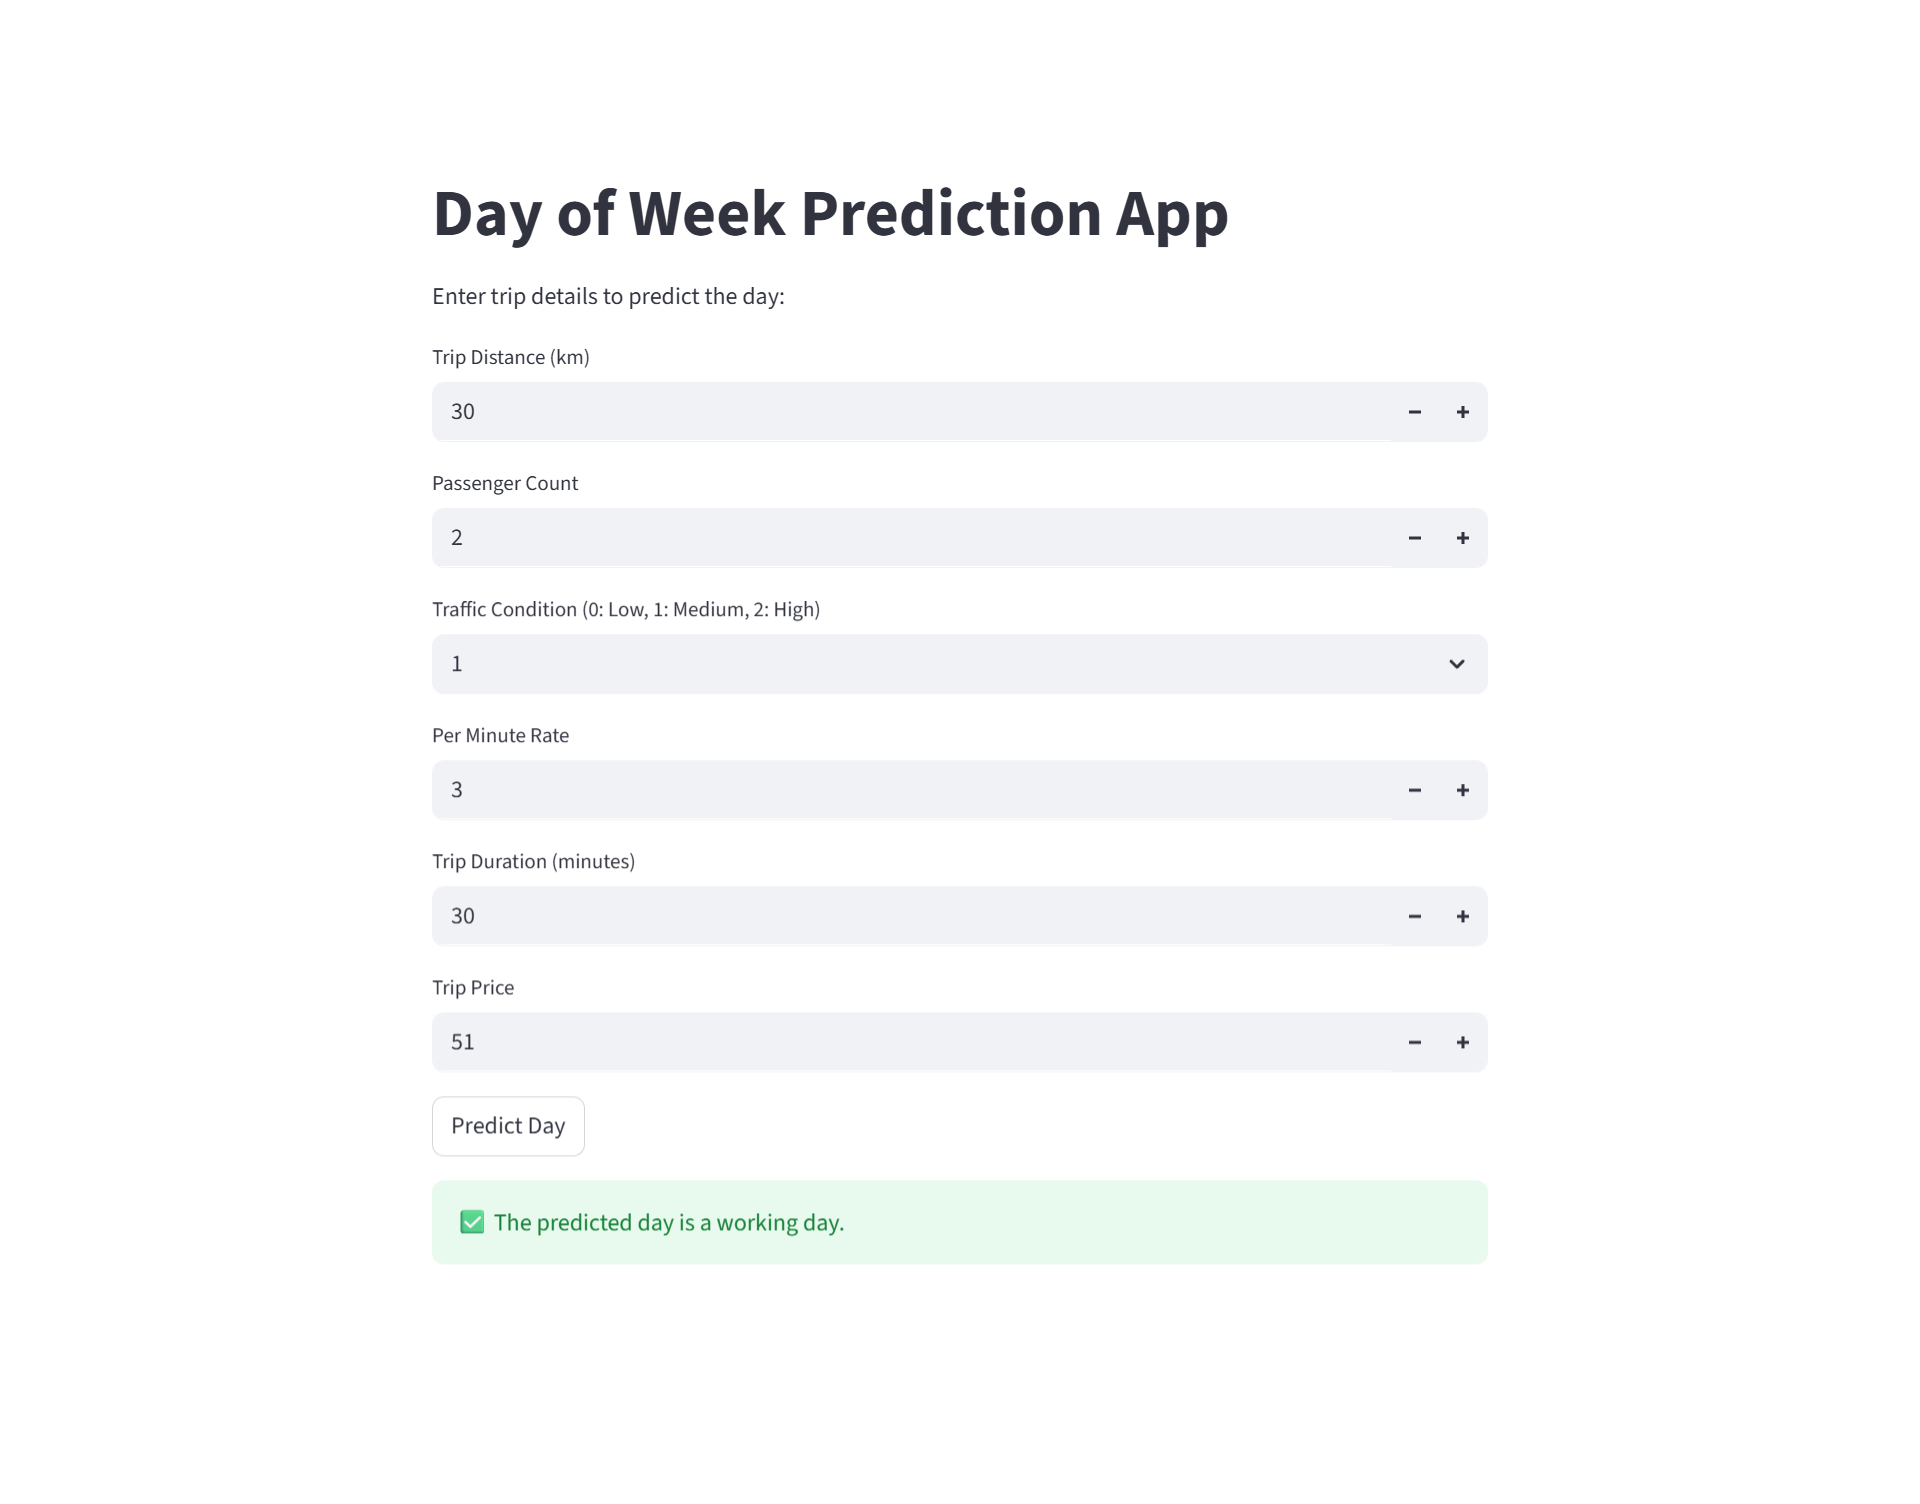

In [ ]:
from google.colab import files
from IPython.display import Image, display

# Upload file
uploaded = files.upload()   # choose image from your computer

# Get the filename
filename = list(uploaded.keys())[0]

# Display image
display(Image(filename=filename))

ADABOOST CLASSIFIER

In [23]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
ls

 diabetes_prediction_using_ANN.ipynb  'taxi_trip_pricing (2).csv'
 kaggle.json                          'taxi_trip_pricing (3).csv'
 model3.pkl                            taxi_trip_pricing.csv
 sample_data/                          trial_web5.py
'taxi_trip_pricing (1).csv'


In [30]:
import pandas as pd
import numpy as np
df=pd.read_csv('taxi_trip_pricing (2).csv')
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [32]:
df.isna().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [33]:
df.shape

(1000, 11)

In [34]:
df.dropna(inplace=True)

In [47]:
df['Day_of_Week'].value_counts()

,count
Day_of_Week,
Weekday,381
Weekend,181


In [37]:
df['Traffic_Conditions'] = df['Traffic_Conditions'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [38]:
x=df[['Trip_Distance_km','Passenger_Count','Traffic_Conditions','Per_Minute_Rate','Trip_Duration_Minutes','Trip_Price']]
y=df['Day_of_Week']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [42]:
adaboost=AdaBoostClassifier(n_estimators=100,random_state=1)

In [43]:
adaboost.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [44]:
y_pred=adaboost.predict(x_test)

In [45]:
print(accuracy_score(y_test,y_pred))

0.6568047337278107


In [49]:
import numpy as np
input=np.asarray([6,5,1,35,3,33.6])
input_reshaped=input.reshape(1,-1)
input_reshaped=scaler.transform(input_reshaped)
prediction=adaboost.predict(input_reshaped)
print(prediction)
if prediction[0]=='Weekday':
  print("Working Day")
else:
  print("Holiday")

['Weekday']
Working Day


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**XGBoost Classifier**

In [50]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [51]:
import pandas as pd
import numpy as np
df=pd.read_csv('taxi_trip_pricing (2).csv')
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [52]:
df.isna().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [53]:
df.shape

(1000, 11)

In [54]:
df.dropna(inplace=True)

In [55]:
df['Traffic_Conditions'] = df['Traffic_Conditions'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [56]:
x=df[['Trip_Distance_km','Passenger_Count','Traffic_Conditions','Per_Minute_Rate','Trip_Duration_Minutes','Trip_Price']]
y=df['Day_of_Week']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.preprocessing import LabelEncoder

model = xgb.XGBClassifier()
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [61]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [62]:
y_pred = model.predict(x_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5309734513274337


In [78]:
import numpy as np
input=np.asarray([6,5,1,35,3,33.6])
input_reshaped=input.reshape(1,-1)
input_reshaped=scaler.transform(input_reshaped)
prediction=model.predict(input_reshaped)
print(prediction)
if prediction[0]=='Weekday':
  print("Working Day")
else:
  print("Holiday")

['Weekday']
Working Day


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Stacking**

In [65]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,0,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,2,Clear,2.70,1.21,0.15,37.27,52.9032
5,8.64,Afternoon,Weekend,2.0,1,Clear,2.55,1.71,0.48,89.33,60.2028
12,41.79,Night,Weekend,3.0,2,Clear,4.60,1.77,0.11,86.95,88.1328
14,9.91,Evening,Weekday,2.0,2,Clear,2.32,1.26,0.34,41.72,28.9914


In [66]:
x=df[['Trip_Distance_km','Passenger_Count','Traffic_Conditions','Per_Minute_Rate','Trip_Duration_Minutes','Trip_Price']]
y=df['Day_of_Week']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [71]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [72]:
# Base models
base_models = [
    ('svc', SVC()),
    ('dt', DecisionTreeClassifier())
]

In [73]:
# Meta-model
meta_model = LogisticRegression()

In [74]:
# Stacking Classifier
model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
model.fit(x_train, y_train)

StackingClassifier(estimators=[('svc', SVC()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [75]:
# Make predictions
y_pred = model.predict(x_test)

In [76]:
# Evaluate
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.672566371681416


In [77]:
import numpy as np
input=np.asarray([6,5,1,35,3,33.6])
input_reshaped=input.reshape(1,-1)
input_reshaped=scaler.transform(input_reshaped)
prediction=model.predict(input_reshaped)
print(prediction)
if prediction[0]=='Weekday':
  print("Working Day")
else:
  print("Holiday")

['Weekday']
Working Day


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Voting Classification**

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [128]:
df=pd.read_csv('taxi_trip_pricing (2).csv')
df.head()


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [129]:
df.dropna(inplace=True)

In [141]:
df_encoded

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Traffic_Conditions_Low,Traffic_Conditions_Medium
0,19.35,Morning,Weekday,3.0,Clear,3.56,0.80,0.32,53.82,36.2624,True,False
2,36.87,Evening,Weekend,1.0,Clear,2.70,1.21,0.15,37.27,52.9032,False,False
5,8.64,Afternoon,Weekend,2.0,Clear,2.55,1.71,0.48,89.33,60.2028,False,True
12,41.79,Night,Weekend,3.0,Clear,4.60,1.77,0.11,86.95,88.1328,False,False
14,9.91,Evening,Weekday,2.0,Clear,2.32,1.26,0.34,41.72,28.9914,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
990,40.17,Evening,Weekday,3.0,Clear,3.81,0.66,0.42,62.66,56.6394,True,False
992,14.34,Afternoon,Weekday,1.0,Clear,3.23,1.01,0.29,45.07,30.7837,False,True
994,18.69,Evening,Weekday,3.0,Clear,4.90,1.79,0.17,79.41,51.8548,False,True
995,5.49,Afternoon,Weekend,4.0,Clear,2.39,0.62,0.49,58.39,34.4049,False,True


In [144]:
dummy_cols = [col for col in df_encoded.columns if 'Traffic_Conditions' in col]
df_encoded[dummy_cols] = df_encoded[dummy_cols].astype(int)
df_encoded.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Traffic_Conditions_Low,Traffic_Conditions_Medium
0,19.35,Morning,Weekday,3.0,Clear,3.56,0.80,0.32,53.82,36.2624,1,0
2,36.87,Evening,Weekend,1.0,Clear,2.70,1.21,0.15,37.27,52.9032,0,0
5,8.64,Afternoon,Weekend,2.0,Clear,2.55,1.71,0.48,89.33,60.2028,0,1
12,41.79,Night,Weekend,3.0,Clear,4.60,1.77,0.11,86.95,88.1328,0,0
14,9.91,Evening,Weekday,2.0,Clear,2.32,1.26,0.34,41.72,28.9914,0,0


In [146]:
x=df_encoded[['Trip_Distance_km','Passenger_Count','Traffic_Conditions_Low','Traffic_Conditions_Medium','Per_Minute_Rate','Trip_Duration_Minutes','Trip_Price']]
y=df_encoded['Weather']

In [154]:
df_encoded['Weather'].value_counts()

,count
Weather,
Clear,386
Rain,134
Snow,42


In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Encode target
le = LabelEncoder()
y = le.fit_transform(df_encoded['Weather'])

# Features
x = df_encoded[['Trip_Distance_km','Passenger_Count',
                'Traffic_Conditions_Low','Traffic_Conditions_Medium',
                'Per_Minute_Rate','Trip_Duration_Minutes','Trip_Price']]

# Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=1, stratify=y
)

# Models
model1 = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
model2 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model3 = SVC(kernel='linear', probability=True,class_weight='balanced')
model4 = LogisticRegression(max_iter=2000,class_weight='balanced')

# Voting classifier
model = VotingClassifier(
    estimators=[
        ('rf', model1),
        ('xgb', model2),
        ('svm', model3),
        ('lr', model4)
    ],
    voting='hard'
)

# Train & evaluate
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:58:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Voting Classifier Accuracy: 0.6194690265486725


In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       Clear       0.69      0.85      0.76        78
        Rain       0.33      0.11      0.17        27
        Snow       0.12      0.12      0.12         8

    accuracy                           0.62       113
   macro avg       0.38      0.36      0.35       113
weighted avg       0.56      0.62      0.57       113

